# Curve Fitting

We may have made a model, but it's still meaningless because it doesn't use actual data. Even if we use actual data, we may not be using data from the population we're modeling. Even if we do, the curve may still not fit. Here comes our second python magic: curve fitting. It will guess the parameters needed to fit the curve.

First we init

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(13, 8))  
plt.rc('lines', linewidth=2)  

## Basic Curve Fitting

Now we make some random curve with noises. It's a gaussian.

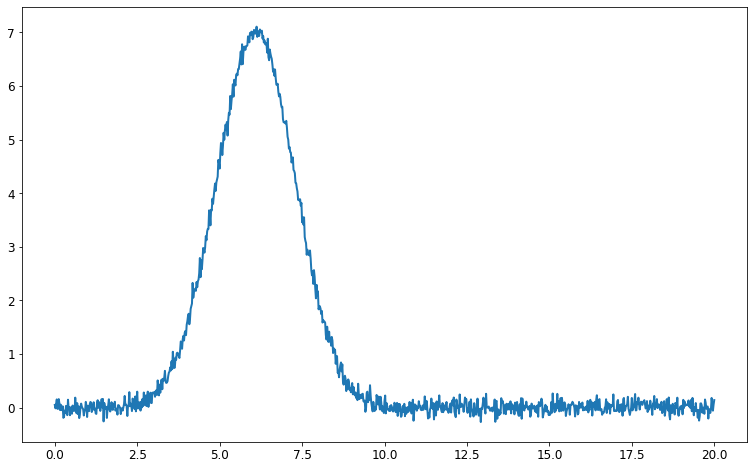

In [3]:
np.random.seed(42)
x = np.linspace(0, 20.0, 1001)
data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=x.size))
plt.plot(x, data)

Now we make the function we want to fit

In [4]:
def f(x, a, b, c):
    return gaussian(x, a, b, c)

Next we prepare to fit it

In [5]:
mod = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=10.0, vary=True)
mod.set_param_hint("b", value=10.0, vary=True)
mod.set_param_hint("c", value=10.0, vary=True)

params = mod.make_params()

Fit

In [6]:
result = mod.fit(data, params, method="leastsq", x=x)  # fitting

{'a': 21.03260705289207, 'b': 6.100343154231707, 'c': 1.200925508829631}

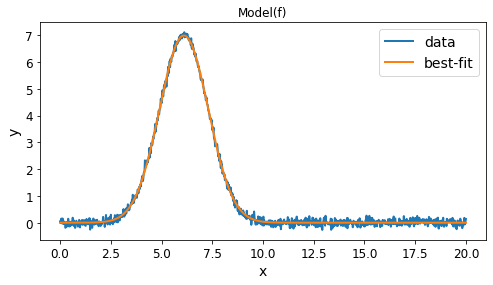

In [7]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-")
result.best_values

In [8]:
result

There we go. The guesses are pretty accurate, right? It can't be perfectly accurate due to the random noise though. But that's just how real data are.

What if it was smooth?

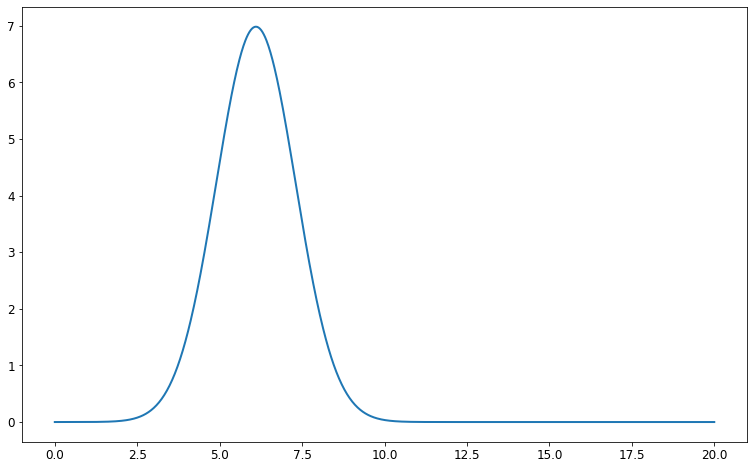

In [9]:
data2 = (gaussian(x, 21, 6.1, 1.2))
plt.plot(x, data2)

{'a': 21.0, 'b': 6.1, 'c': 1.2000000000000002}

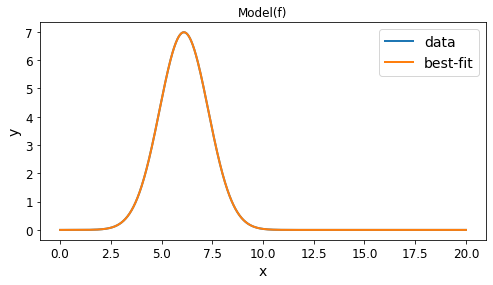

In [10]:
mod2 = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod2.set_param_hint("a", value=10.0, vary=True)
mod2.set_param_hint("b", value=10.0, vary=True)
mod2.set_param_hint("c", value=10.0, vary=True)

params2 = mod2.make_params()
result2 = mod2.fit(data2, params2, method="leastsq", x=x)  # fitting
plt.figure(figsize=(8,4))
result2.plot_fit(datafmt="-")
result2.best_values

In [11]:
result

Near perfect. Do note that the more variable it has, the lower the accuracy may be. The initial values also play a big part.

## Data

Let's prepare the data

In [12]:
beds = pd.read_csv("data/beds.csv", header=0)
agegroups = pd.read_csv("data/agegroups.csv")
probabilities = pd.read_csv("data/probabilities.csv")
covid_data = pd.read_csv("data/time_series_covid19_deaths_global_narrow.csv", parse_dates=["Date"], skiprows=[1])
covid_data["Location"] = covid_data["Country/Region"]

In [13]:
beds

,Country,Continent,ICU_Beds
0,Japan,Asia,7.30
1,South Korea,Asia,10.60
2,Russia,Europe,8.30
3,Germany,Europe,29.20
4,Austria,Europe,21.80
5,Hungary,Europe,13.80
6,Czech Republic,Europe,11.60
7,Poland,Europe,6.90
8,Lithuania,Europe,15.50
9,France,Europe,11.60


In [14]:
agegroups

,Unnamed: 0,Location,0_9,10_19,20_29,30_39,40_49,50_59,60_69,70_79,80_89,90_100,Total
0,0,World,1.342381e+09,1.253463e+09,1.192080e+09,1.150350e+09,973155000.0,833622000.0,591786000.0,312459000.0,124116000.0,20814000.0,7.794226e+09
1,1,Sustainable Development Goal (SDG) regions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,2,Sub-Saharan Africa,3.243990e+08,2.534300e+08,1.851890e+08,1.334170e+08,89292000.0,56464000.0,33385000.0,15120000.0,3477000.0,191000.0,1.094364e+09
3,3,Eastern Africa,1.300380e+08,1.056750e+08,7.815600e+07,5.410800e+07,35271000.0,21714000.0,12849000.0,5978000.0,1513000.0,102000.0,4.454040e+08
4,4,Burundi,3.873000e+06,2.725000e+06,2.030000e+06,1.539000e+06,748000.0,492000.0,339000.0,112000.0,30000.0,2000.0,1.189000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,Liechtenstein,6.600000e+04,6.500000e+04,8.600000e+04,9.800000e+04,95000.0,91000.0,62000.0,38000.0,20000.0,4000.0,6.250000e+05
237,237,Monaco,6.600000e+04,6.500000e+04,8.600000e+04,9.800000e+04,95000.0,91000.0,62000.0,38000.0,20000.0,4000.0,6.250000e+05
238,238,Saint Kitts and Nevis,2.200000e+04,2.400000e+04,3.300000e+04,2.800000e+04,26000.0,23000.0,14000.0,8000.0,3000.0,1000.0,1.820000e+05
239,239,San Marino,6.600000e+04,6.500000e+04,8.600000e+04,9.800000e+04,95000.0,91000.0,62000.0,38000.0,20000.0,4000.0,6.250000e+05


In [15]:
probabilities

,Age,prob_I_to_ICU_1,prob_ICU_to_Death_1,prob_I_to_ICU_2,prob_ICU_to_Death_2
0,0_9,0.001,0.00,0.00100,0.000
1,10_19,0.003,0.00,0.00300,0.000
2,20_29,0.009,0.05,0.00600,0.000
3,30_39,0.025,0.06,0.00900,0.000
4,40_49,0.030,0.10,0.02500,0.120
5,50_59,0.050,0.26,0.03560,0.365
6,60_69,0.070,0.57,0.05926,0.675
7,70_79,0.100,0.86,0.10100,0.850
8,80_89,0.140,0.95,0.14100,0.950
9,90_100,0.160,0.98,0.16000,0.990


In [16]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code,Location
0,NaN,Afghanistan,33.0,65.0,2020-07-01,774,AFG,142.0,34.0,NaN,Afghanistan
1,NaN,Afghanistan,33.0,65.0,2020-06-30,746,AFG,142.0,34.0,NaN,Afghanistan
2,NaN,Afghanistan,33.0,65.0,2020-06-29,733,AFG,142.0,34.0,NaN,Afghanistan
3,NaN,Afghanistan,33.0,65.0,2020-06-28,721,AFG,142.0,34.0,NaN,Afghanistan
4,NaN,Afghanistan,33.0,65.0,2020-06-27,703,AFG,142.0,34.0,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
43087,NaN,Zimbabwe,-20.0,30.0,2020-01-26,0,ZWE,2.0,202.0,14.0,Zimbabwe
43088,NaN,Zimbabwe,-20.0,30.0,2020-01-25,0,ZWE,2.0,202.0,14.0,Zimbabwe
43089,NaN,Zimbabwe,-20.0,30.0,2020-01-24,0,ZWE,2.0,202.0,14.0,Zimbabwe
43090,NaN,Zimbabwe,-20.0,30.0,2020-01-23,0,ZWE,2.0,202.0,14.0,Zimbabwe


Make some dicts

In [17]:
# create some dicts for fast lookup
# 1. beds
beds_lookup = dict(zip(beds["Country"], beds["ICU_Beds"]))
# 2. agegroups
agegroup_lookup = dict(zip(agegroups['Location'], agegroups[['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_100']].values))

In [18]:
beds_lookup

{'Japan': 7.3,
 'South Korea': 10.6,
 'Russia': 8.3,
 'Germany': 29.2,
 'Austria': 21.8,
 'Hungary': 13.8,
 'Czech Republic': 11.6,
 'Poland': 6.9,
 'Lithuania': 15.5,
 'France': 11.6,
 'Slovakia': 9.2,
 'Belgium': 15.9,
 'Latvia': 9.7,
 'Hong Kong': 7.1,
 'Estonia': 14.6,
 'Luxembourg': 24.8,
 'Switzerland': 11.0,
 'Slovenia': 6.4,
 'China': 3.6,
 'Greece': 6.0,
 'Australia': 9.1,
 'Norway': 8.0,
 'Portugal': 4.2,
 'Netherlands': 6.4,
 'Finland': 6.1,
 'Italy': 12.5,
 'Iceland': 9.1,
 'Israel': nan,
 'Spain': 9.7,
 'Ireland': 6.5,
 'Turkey': 29.8,
 'United States': 34.7,
 'New Zealand': 3.67,
 'Denmark': 6.7,
 'United Kingdom': 6.6,
 'Canada': 13.5,
 'Sweden': 5.8,
 'Chile': 6.0,
 'Colombia': 0.9,
 'India': 5.2,
 'Mexico': 1.2,
 'Africa': 0.1,
 'Europe': 12.5,
 'Asia': 6.1,
 'North America': 14.6,
 'South America': 3.0}

In [19]:
agegroup_lookup

{'World': array([1.342381e+09, 1.253463e+09, 1.192080e+09, 1.150350e+09,
        9.731550e+08, 8.336220e+08, 5.917860e+08, 3.124590e+08,
        1.241160e+08, 2.081400e+07]),
 'Sustainable Development Goal (SDG) regions': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'Sub-Saharan Africa': array([3.24399e+08, 2.53430e+08, 1.85189e+08, 1.33417e+08, 8.92920e+07,
        5.64640e+07, 3.33850e+07, 1.51200e+07, 3.47700e+06, 1.91000e+05]),
 'Eastern Africa': array([1.30038e+08, 1.05675e+08, 7.81560e+07, 5.41080e+07, 3.52710e+07,
        2.17140e+07, 1.28490e+07, 5.97800e+06, 1.51300e+06, 1.02000e+05]),
 'Burundi': array([3.873e+06, 2.725e+06, 2.030e+06, 1.539e+06, 7.480e+05, 4.920e+05,
        3.390e+05, 1.120e+05, 3.000e+04, 2.000e+03]),
 'Comoros': array([238000., 192000., 151000., 118000.,  77000.,  51000.,  30000.,
         12000.,   3000.,      0.]),
 'Djibouti': array([197000., 180000., 177000., 162000., 121000.,  78000.,  44000.,
         22000.,   6000.,      0.]),
 'Eri

Split the probabilities

In [20]:
# store the probabilities collected
prob_I_to_C_1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I_to_C_2 = list(probabilities.prob_I_to_ICU_2.values)
prob_C_to_Death_1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_C_to_Death_2 = list(probabilities.prob_ICU_to_Death_2.values)
prob_I_to_C_1 #The first column

[0.001, 0.003, 0.009000000000000001, 0.025, 0.03, 0.05, 0.07, 0.1, 0.14, 0.16]

Total death plot

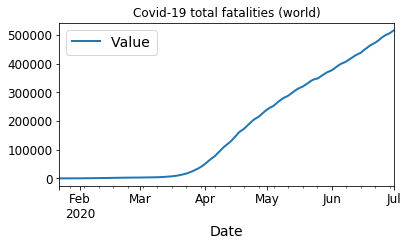

In [21]:
covid_data.groupby("Date").sum()[["Value"]].plot(figsize=(6, 3), title="Covid-19 total fatalities (world)")

## Model

Let's move our latest model here.

In [22]:
def dpseicrd_rl_ext(y, t, population, 
                exposed_rate_normal, exposed_rate_critical, infectious_rate, 
                critical_rate, critical_chance, 
                recovery_rate_normal, recovery_rate_critical, 
                critical_limit, 
                death_rate_normal, death_chance_normal, 
                death_rate_over, death_chance_over):
    
    population, susceptible, exposed_normal, exposed_over, infectious, critical_cared, critical_over, recovered, dead_normal, dead_over = y
    
    
    exposed_flow_normal = exposed_rate_normal(t) * susceptible * infectious / population
    exposed_flow_over = exposed_rate_critical * susceptible * critical_over / population
    
    infectious_flow_normal = infectious_rate * exposed_normal * 1
    infectious_flow_over = infectious_rate * exposed_over * 1
    
    recovery_flow_normal = recovery_rate_normal * infectious * (1-critical_chance)
    recovery_flow_critical = recovery_rate_critical * critical_cared * (1-death_chance_normal)
    
    death_flow_normal = death_rate_normal * critical_cared * death_chance_normal
    death_flow_over = death_rate_over * critical_over * death_chance_over
    
    #tricky part because it should be immediate
    
    #recovering or dying people will free up available care
    available_care = critical_limit(t) - critical_cared + recovery_flow_critical + death_flow_normal
    if available_care < 0:
        raise Exception("available_care should never be negative")
    
    #overflow applying for hospital should take precedence
    #well it's not like it will matter in numbers since new critical people will take their place here
    
    critical_over_return = 1 * min(available_care, critical_over) * 1
    
    available_care_2 = available_care - critical_over_return
    if available_care_2 < 0:
        raise Exception("available_care_2 should never be negative")
    
    #next, the new criticals will flow in
    
    critical_flow = critical_rate * infectious * critical_chance
    critical_flow_cared = min(available_care_2, critical_flow)
    
    available_care_3 = available_care_2 - critical_flow_cared
    if available_care_3 < 0:
        raise Exception("available_care_3 should never be negative")
    
    #the remains of that flow will go to over compartment
    critical_flow_over = critical_flow - critical_flow_cared
    
    dSdt = -exposed_flow_normal - exposed_flow_over
    dENdt = exposed_flow_normal - infectious_flow_normal
    dEOdt = exposed_flow_over - infectious_flow_over
    dIdt = infectious_flow_normal + infectious_flow_over - recovery_flow_normal - critical_flow_cared - critical_flow_over
    dCCdt = critical_flow_cared + critical_over_return - recovery_flow_critical - death_flow_normal
    dCOdt = critical_flow_over - death_flow_over - critical_over_return
    dRdt = recovery_flow_normal + recovery_flow_critical
    dDNdt = death_flow_normal
    dDOdt = death_flow_over
    dPdt = dSdt + dENdt + dEOdt + dIdt + dCCdt + dCOdt + dRdt + dDNdt + dDOdt
    
    return dPdt, dSdt, dENdt, dEOdt, dIdt, dCCdt, dCOdt, dRdt, dDNdt, dDOdt

In [23]:
def plot_pseicrd_l_ext(t, population, 
                       susceptible, exposed_normal, exposed_over, infectious, 
                       critical_cared, critical_over, recovered, 
                       dead_normal, dead_over, critical_limit):
    fig, ax = plt.subplots(1, 1)
    
    #totals
    exposed = sum_element(exposed_normal, exposed_over)
    critical = sum_element(critical_cared, critical_over)
    dead = sum_element(dead_normal, dead_over)
    
    
    #main plot
    
    ax.plot(t, susceptible, 'b', alpha=0.7, label='Susceptible')
    ax.plot(t, exposed, 'y', alpha=0.7, label='Exposed')
    ax.plot(t, infectious, 'r', alpha=0.7, label='Infectious')
    ax.plot(t, critical, 'orange', alpha=0.7, label='Critical')
    ax.plot(t, recovered, 'g', alpha=0.7, label='Recovered')
    ax.plot(t, dead, 'black', alpha=0.7, label='Dead')
    ax.plot(t, population, 'grey', alpha=0.3, label='Population', ls='dotted')
    ax.plot(t, critical_limit, 'red', alpha=0.3, label='Healthcare', ls='dotted')
    
    ax.title.set_text('SEICRD')

    ax.set_xlabel('Time (days)', labelpad=10)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    ax.grid(b=True, which='major', c='w', lw=0.5, ls='-', alpha=0.25)

    ax.legend(loc='best', shadow=True)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    # R0
    
    fig2, ax2 = plt.subplots(1, 1)
    ax2.plot(t, map_function(t, logistic_r0), 'y', alpha=0.5, linewidth=2, label='R0 normal')
    ax2.plot(t, map_function(critical_over, r0_over), 'r', alpha=0.5, linewidth=2, label='R0 over')
    r0_overall_val = np.array([r0_overall(t[i], critical_over[i]) for i in range(0, len(t))])
    ax2.plot(t, r0_overall_val, 'orange', alpha=0.7, linewidth=2, label='R0 overall')

    ax2.title.set_text('R0 over time')
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax2.spines[spine].set_visible(False)
        
        
    # over cases only
    
    fig3, ax3 = plt.subplots(1, 1)
    ax3.plot(t, exposed_over, 'blue', alpha=0.7, linewidth=2, label='Exposed by Neglected')
    ax3.plot(t, critical_over, 'orange', alpha=0.7, linewidth=2, label="Critical but Neglected")
    ax3.plot(t, dead_over, 'black', alpha=0.7, linewidth=2, label='Dead by Neglect')

    ax3.title.set_text('Insufficient Healthcare')
    ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax3.spines[spine].set_visible(False)
    
    #death chance
    
    # sp2
    death_chance_calc = [0] + [100 * dead[i] / sum(infectious_rate*exposed[:i]) if sum(infectious_rate*exposed[:i])>0 else 0 for i in range(1, len(t))]
    
    fig4, ax4 = plt.subplots(1, 1)
    ax4.plot(t, death_chance_calc, 'blue', alpha=0.7, linewidth=2, label='Death Chance')

    ax4.title.set_text('Insufficient Healthcare')
    ax4.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax4.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax4.spines[spine].set_visible(False)
        
    #daily seicrd
    fig5, ax5 = plt.subplots(1, 1)
    
    daily_exposed = delta(exposed)
    daily_infectious = delta(infectious)
    daily_critical = delta(critical)
    daily_recovered = delta(recovered)
    daily_dead = delta(dead)
    
    ax5.plot(t, daily_exposed, 'y', alpha=0.7, label='Exposed')
    ax5.plot(t, daily_infectious, 'r', alpha=0.7, label='Infectious')
    ax5.plot(t, daily_critical, 'orange', alpha=0.7, label='Critical')
    ax5.plot(t, daily_recovered, 'g', alpha=0.7, label='Recovered')
    ax5.plot(t, daily_dead, 'black', alpha=0.7, label='Dead')
    ax5.plot(t, critical_limit, 'red', alpha=0.3, label='Healthcare', ls='dotted')
    
    ax5.title.set_text('Daily SEICRD')

    ax5.set_xlabel('Time (days)', labelpad=10)

    ax5.yaxis.set_tick_params(length=0)
    ax5.xaxis.set_tick_params(length=0)

    ax5.grid(b=True, which='major', c='w', lw=0.5, ls='-', alpha=0.25)

    ax5.legend(loc='best', shadow=True)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax5.spines[spine].set_visible(False)
    
    
        
    # healthcare limit
    
    fig6, ax6 = plt.subplots(1, 1)
    ax6.plot(t, critical_cared, 'blue', alpha=0.7, linewidth=2, label='Critical cared')
    ax6.plot(t, critical_limit, 'orange', alpha=0.7, linewidth=2, label="Healthcare Limit")

    ax6.title.set_text('Healthcare limit')
    ax6.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax6.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax6.spines[spine].set_visible(False)
    
    plt.show()

In [24]:
population = 1000
exposed_rate_0 = 1.0  # infected person infects 1 other person per day
incubation_period = 5.0 # it requires 5 days before someone can infect others
infectious_rate = 1.0 / incubation_period
recovery_time_normal = 4.0 # infections lasts four days for normal infection
recovery_rate_normal = 1.0 / recovery_time_normal
death_time_normal = 3.0 # dying patients die in 3 days
death_rate_normal = 1.0 / death_time_normal
death_chance_normal = 0.2 #20% patients die
critical_time = 7.0 #people may become critical after a week
critical_rate = 1.0 / critical_time
critical_chance = 0.4 #40% infected will need hospital care
recovery_time_critical = 5.0 # infections lasts 5 days for critical patients
recovery_rate_critical = 1.0 / recovery_time_critical

infectious_period_opt = recovery_time_normal * (1-critical_chance) + critical_time * critical_chance

r0_0 = exposed_rate_0 * infectious_period_opt

r0_L = 0.5 #let's say the lockdown reduces the R0 to 0.5. That's already very good.
L_start = 30 #Lockdown starts on t=30
L_end = 60 #Lockdown ends on t=60

r0_delta = r0_0 - r0_L
k = 1

critical_limit = 20 #limit of hospital bed. only 20 since critical is small in our model
death_time_over = 2.0
death_rate_over = 1.0/death_time_over
death_chance_over = 1 #criticals not receiving health care will surely die

exposed_rate_critical = 2.0

critical_limit_data = [
    (0, 20),
    (40, 30)
]
population_init, susceptible_init, exposed_normal_init, exposed_over_init, infectious_init, critical_cared_init, critical_over_init, recovered_init, dead_normal_init, dead_over_init = population, 999, 1, 0, 0, 0, 0, 0, 0, 0  # initial conditions: one exposed, rest susceptible

In [25]:
def logistic_r0(t):
    e1 = np.exp(k*(-t+L_start))
    e2 = np.exp(k*(-t+L_end))
    return r0_0 + (r0_L-r0_0) / (1 + e1) + (r0_0-r0_L) / (1 + e2)

def exposed_rate_logistic(t):
    return logistic_r0(t) / infectious_period_opt

def r0_over(critical_over):
    return exposed_rate_critical * death_time_over * critical_chance * (critical_over/population)

def r0_overall(t, critical_over):
    return logistic_r0(t) + r0_over(critical_over)

In [26]:
def map_function(t, f):
    return np.array([f(ti) for ti in t])

def plot_single(t, f, label):
    fig, ax = plt.subplots(1, 1)
    ax.plot(t, map_function(t, f), 'b', alpha=0.7, label=label)

    ax.set_xlabel('Time (days)', labelpad=10)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    ax.grid(b=True, which='major', c='w', lw=0.5, ls='-', alpha=0.25)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),
              fancybox=True, shadow=True, ncol=7)
    
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
        
    plt.show()

In [27]:
def critical_limit(t):
    ret = float("inf")
    for day, limit in critical_limit_data:
        if day <= t:
            ret = limit
        else:
            break
    return ret

In [28]:
from operator import add
def sum_element(a, b):
    return np.array(list(map(add, a, b)))
def delta(arr):
    return np.array([arr[0]] + [arr[i]-arr[i-1] for i in range(1, len(arr))])

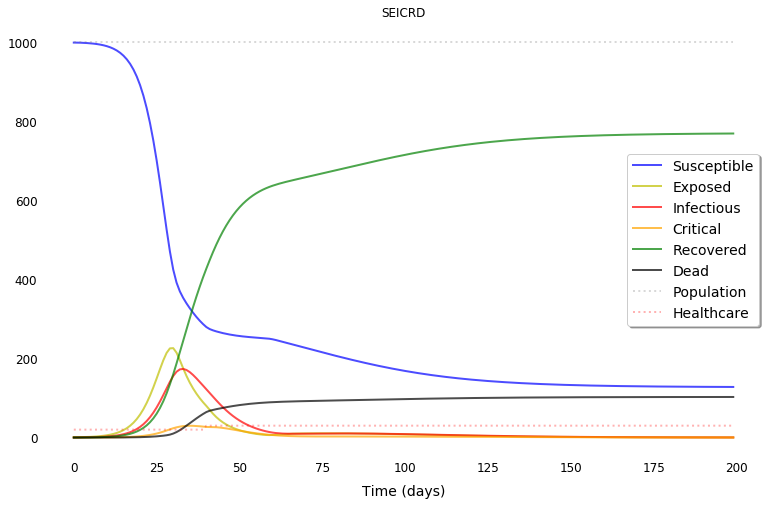

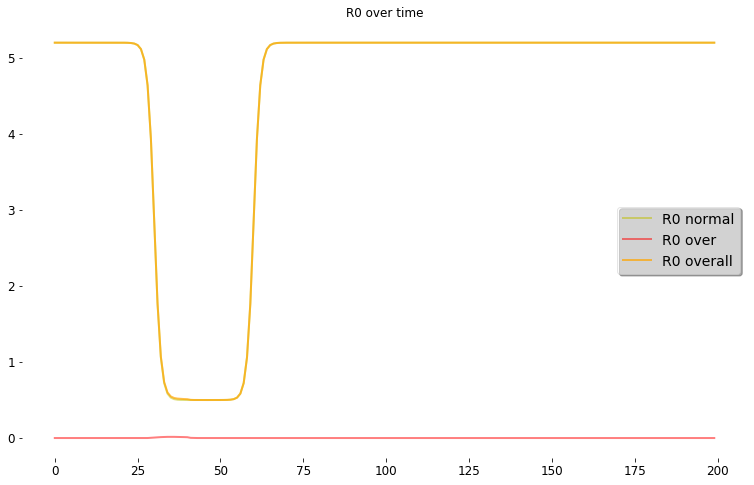

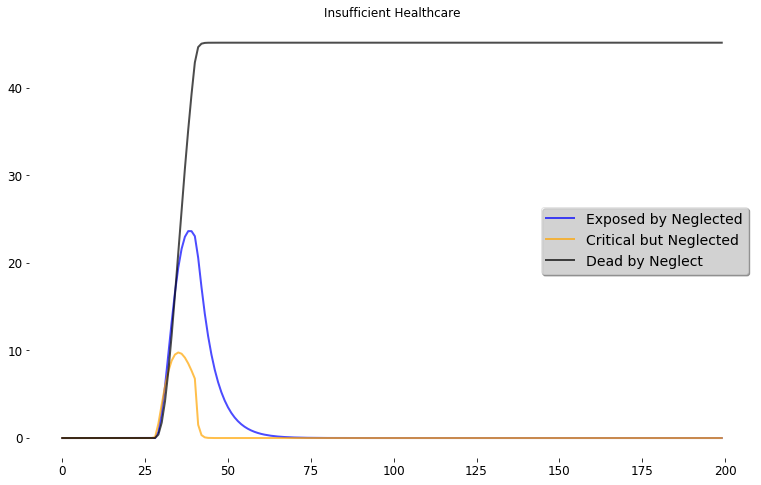

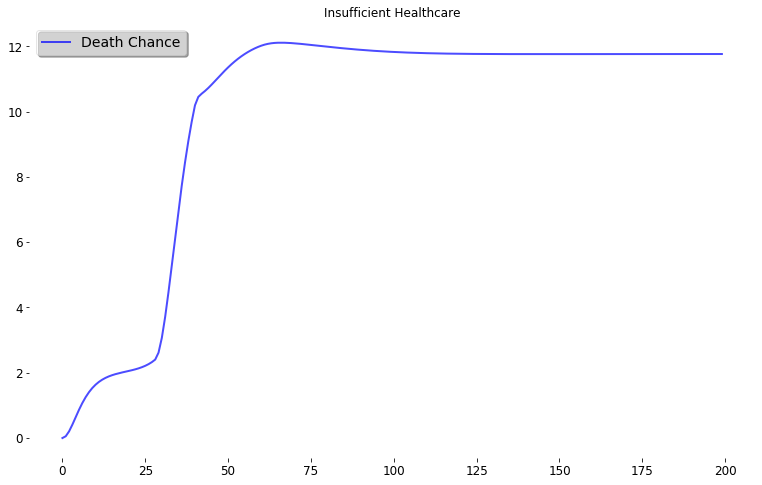

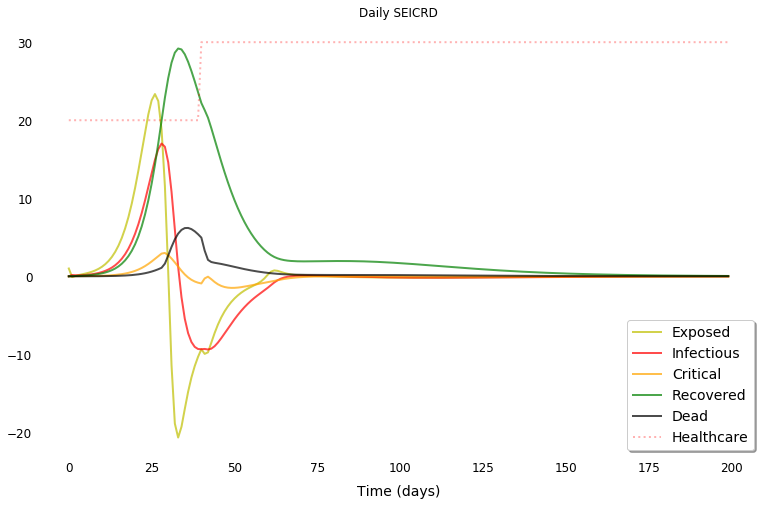

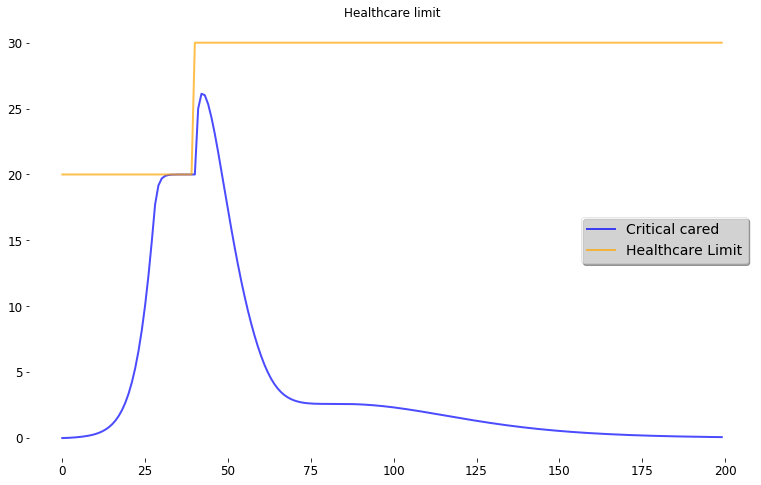

In [29]:
t = np.linspace(0, 199, 200) # 200 days
y0 = population_init, susceptible_init, exposed_normal_init, exposed_over_init, infectious_init, critical_cared_init, critical_over_init, recovered_init, dead_normal_init, dead_over_init # Initial conditions tuple

# Integrate the SIR equations over the time grid, t.
ret = odeint(dpseicrd_rl_ext, y0, t, args=(
    population, exposed_rate_logistic, exposed_rate_critical, infectious_rate, 
    critical_rate, critical_chance, 
    recovery_rate_normal, recovery_rate_critical, 
    critical_limit, 
    death_rate_normal, death_chance_normal,
    death_rate_over, death_chance_over
))
population_2, susceptible, exposed_normal, exposed_over, infectious,  critical_cared, critical_over, recovered,  dead_normal, dead_over = ret.T
plot_pseicrd_l_ext(t, population_2, susceptible, 
               exposed_normal, exposed_over, infectious, 
               critical_cared, critical_over, recovered, 
               dead_normal, dead_over, map_function(t, critical_limit))

First, let's prepare our basic parameters. What do we have?

In [30]:
population = 1000 # this differs for each population
incubation_period = 14 # this can be global
infectious_rate = 1.0 / incubation_period # this is derived parameter
recovery_time_normal = 4.0 # this differs for each population, we don't have this
recovery_rate_normal = 1.0 / recovery_time_normal # this is derived parameter
death_time_normal = 3.0 # this differs for each population, we don't have this
death_rate_normal = 1.0 / death_time_normal # this is derived parameter
death_chance_normal = 0.2 # this can be global
critical_time = 7.0 # this can be global, but we don't have this
critical_rate = 1.0 / critical_time # this is derived parameter
critical_chance = 0.4 # this differs for each population, and we don't really have this (only the cared ones are recorded)
recovery_time_critical = 5.0 # this differs for each population, but we don't have this
recovery_rate_critical = 1.0 / recovery_time_critical #this is derived parameter

infectious_period_opt = recovery_time_normal * (1-critical_chance) + critical_time * critical_chance #this is derived parameter



r0_0 = 2.0 # this should differ for each population, and we don't have this
r0_L = 0.5 # this should differ for each population, and we don't have this
L_start = 30 # this can be found in news
L_end = 60 # this can be found in news

r0_delta = r0_0 - r0_L # this is derived parameter
k = 1 # we really don't have this

death_time_over = 2.0 # we don't have this
death_rate_over = 1.0/death_time_over # this is a derived parameter
death_chance_over = 1 # it's a sure thing

exposed_rate_critical = 2.0 # we don't have this

critical_limit_data = [ # this should differ for each population, and we don't have this
    (0, 20),
    (40, 30)
]

Now to group them

In [31]:
# sure thing 
death_chance_over = 1 # it's a sure thing

# this can be global
incubation_period = 14 # this can be global
death_chance_normal = 0.2 # this can be global

# this differs for each population
population = 1000 # this differs for each population

# this can be found in news
L_start = 30 # this can be found in news
L_end = 60 # this can be found in news

# this can be global, but we don't have this
critical_time = 7.0 # this can be global, but we don't have this

# this differs for each population, we don't have this
recovery_time_normal = 4.0 # this differs for each population, we don't have this
death_time_normal = 3.0 # this differs for each population, we don't have this
critical_chance = 0.4 # this differs for each population, and we don't really have this (only the cared ones are recorded)
recovery_time_critical = 5.0 # this differs for each population, but we don't have this
r0_0 = 2.0 # this should differ for each population, and we don't have this
r0_L = 0.5 # this should differ for each population, and we don't have this

critical_limit_data = [ # this should differ for each population, we don't have this
    (0, 20),
    (40, 30)
]

# we really don't have this
k = 1 # we really don't have this
death_time_over = 2.0 # we don't have this

exposed_rate_critical = 2.0 # we don't have this

# this is derived parameter
infectious_period_opt = recovery_time_normal * (1-critical_chance) + critical_time * critical_chance #this is derived parameter
infectious_rate = 1.0 / incubation_period # this is derived parameter
recovery_rate_normal = 1.0 / recovery_time_normal # this is derived parameter
death_rate_normal = 1.0 / death_time_normal # this is derived parameter
critical_rate = 1.0 / critical_time # this is derived parameter
recovery_rate_critical = 1.0 / recovery_time_critical #this is derived parameter
death_rate_over = 1.0/death_time_over # this is a derived parameter
r0_delta = r0_0 - r0_L # this is derived parameter

Way too much. Let's... reduce it 

In [32]:
# sure thing 
death_chance_over = 1 # it's a sure thing

# this can be global
incubation_period = 3.0 # this can be global. shouldnt it be 14?
death_chance_normal = 0.2 # this can be global

# this differs for each population
population = 1000 # this differs for each population

# this can be global, we dont have this but we got this from tutorial
critical_time = 12.0 # this can be global, we dont have this but we got this from tutorial

# this differs for each population, we dont have this but we got this from tutorial
recovery_time_normal = 9.0 # this differs for each population, we dont have this but we got this from tutorial
death_time_normal = 7.5 # this differs for each population, we dont have this but we got this from tutorial
recovery_time_critical = 6.5 # this differs for each population, we dont have this but we got this from tutorial

# this can be found in news, but still needs fitting
L_start = 30 # this can be found in news, but still needs fitting
L_end = 60 # this can be found in news, but still needs fitting

# this differs for each population, we dont have this but we got this from tutorial
critical_chance = 0.4 # this differs for each population, and we don't really have this (only the cared ones are recorded)
r0_0 = 2.0 # this should differ for each population, and we don't have this
r0_L = 0.5 # this should differ for each population, and we don't have this

critical_limit_data = [ # this should differ for each population, we don't have this
    (0, 20),
    (40, 30)
]

# we don't have this
k = 1 # we really don't have this
death_time_over = 2.0 # we don't have this
exposed_rate_critical = 2.0 # we don't have this

# this is derived parameter
infectious_period_opt = recovery_time_normal * (1-critical_chance) + critical_time * critical_chance #this is derived parameter
infectious_rate = 1.0 / incubation_period # this is derived parameter
recovery_rate_normal = 1.0 / recovery_time_normal # this is derived parameter
death_rate_normal = 1.0 / death_time_normal # this is derived parameter
critical_rate = 1.0 / critical_time # this is derived parameter
recovery_rate_critical = 1.0 / recovery_time_critical #this is derived parameter
death_rate_over = 1.0/death_time_over # this is a derived parameter
r0_delta = r0_0 - r0_L # this is derived parameter

Whatever. Let's move on. Put everything inside. Return here later.

In [33]:
import math
def check_finite_many(retT):
    not_finite = []
    for i in range(0, len(retT)):
        if not np.isfinite(retT[i]).all():
            not_finite.append(i)
    
    if len(not_finite) > 0:
        raise Exception("Not finite: " + str(not_finite))
        
def check_finite(retT):
    not_finite = []
    for i in range(0, len(retT)):
        if not math.isfinite(retT[i]):
            not_finite.append(i)
    
    if len(not_finite) > 0:
        raise Exception("Not finite: " + str(not_finite))

In [34]:
def Model(days, population, critical_limit_data, critical_chance, death_chance_normal, death_time_over, exposed_rate_critical, r0_0, r0_L, L_start, L_end, k):
    check_finite((days, population, critical_chance, death_chance_normal, death_time_over, exposed_rate_critical, r0_0, r0_L, L_start, L_end, k))
    check_finite_many(critical_limit_data)
    
    # sure thing 
    death_chance_over = 1 # it's a sure thing

    # this can be global
    incubation_period = 3.0 # this can be global. shouldnt it be 14?
    #death_chance_normal = 0.2 # this can be global

    # this differs for each population
    #population = 1000 # this differs for each population

    # this can be global, we dont have this but we got this from tutorial
    critical_time = 12.0 # this can be global, we dont have this but we got this from tutorial

    # this differs for each population, we dont have this but we got this from tutorial
    recovery_time_normal = 9.0 # this differs for each population, we dont have this but we got this from tutorial
    death_time_normal = 7.5 # this differs for each population, we dont have this but we got this from tutorial
    recovery_time_critical = 6.5 # this differs for each population, we dont have this but we got this from tutorial

    # this can be found in news, but still needs fitting
    #L_start = 30 # this can be found in news, but still needs fitting
    #L_end = 60 # this can be found in news, but still needs fitting

    # this differs for each population, we dont have this but we got this from tutorial
    #critical_chance = 0.4 # this differs for each population, and we don't really have this (only the cared ones are recorded)
    #r0_0 = 2.0 # this should differ for each population, and we don't have this
    #r0_L = 0.5 # this should differ for each population, and we don't have this

    #critical_limit_data = [ # this should differ for each population, we don't have this
    #    (0, 20),
    #    (40, 30)
    #]

    # we don't have this
    #k = 1 # we really don't have this
    #death_time_over = 2.0 # we don't have this
    #exposed_rate_critical = 2.0 # we don't have this

    check_finite((death_chance_over, incubation_period, critical_time, recovery_time_normal, death_time_normal, recovery_time_critical))
    
    # this is derived parameter
    infectious_period_opt = recovery_time_normal * (1-critical_chance) + critical_time * critical_chance #this is derived parameter
    infectious_rate = 1.0 / incubation_period # this is derived parameter
    recovery_rate_normal = 1.0 / recovery_time_normal # this is derived parameter
    death_rate_normal = 1.0 / death_time_normal # this is derived parameter
    critical_rate = 1.0 / critical_time # this is derived parameter
    recovery_rate_critical = 1.0 / recovery_time_critical #this is derived parameter
    death_rate_over = 1.0/death_time_over # this is a derived parameter
    r0_delta = r0_0 - r0_L # this is derived parameter

    check_finite((infectious_period_opt, infectious_rate, recovery_rate_normal, death_rate_normal, critical_rate, recovery_rate_critical, death_rate_over, r0_delta))
    
    def logistic_r0(t):
        e1 = np.exp(-k*(-t+L_start))
        e2 = np.exp(k*(-t+L_end))
        
        r0 = r0_L + r0_delta / (1 + e1) + r0_delta / (1 + e2)
        '''
        try:
            check_finite((e1, e2, r0))
        except Exception as ex:
            raise Exception(str(ex) + "\nArgs(t, k, r0_L, r0_delta, L_start, L_end, e1, e2, r0)=" + str((t, k, r0_L, r0_delta, L_start, L_end, e1, e2, r0)))
        '''
        return r0

    def exposed_rate_logistic(t):
        ret = logistic_r0(t) / infectious_period_opt
        check_finite((ret,))
        return ret
    
    def critical_limit(t):
        smallest_day = -1
        ret = float("inf")
        #ret = 1000
        for day, limit in critical_limit_data:
            if smallest_day < day and day <= t:
                smallest_day = day
                ret = limit
            else:
                break
        check_finite((ret,))
        return ret

    population_init, susceptible_init, exposed_normal_init, exposed_over_init, infectious_init, critical_cared_init, critical_over_init, recovered_init, dead_normal_init, dead_over_init = population, population-1, 1, 0, 0, 0, 0, 0, 0, 0  # initial conditions: one exposed, rest susceptible
    
    t = np.linspace(0, days-1, days) # days
    y0 = population_init, susceptible_init, exposed_normal_init, exposed_over_init, infectious_init, critical_cared_init, critical_over_init, recovered_init, dead_normal_init, dead_over_init # Initial conditions tuple

    check_finite(y0)
    
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(dpseicrd_rl_ext, y0, t, args=(
        population, exposed_rate_logistic, exposed_rate_critical, infectious_rate, 
        critical_rate, critical_chance, 
        recovery_rate_normal, recovery_rate_critical, 
        critical_limit, 
        death_rate_normal, death_chance_normal,
        death_rate_over, death_chance_over
    ))
    retT = ret.T
    population_2, susceptible, exposed_normal, exposed_over, infectious,  critical_cared, critical_over, recovered,  dead_normal, dead_over = retT
    
    check_finite_many(retT)
    
    critical_limit_val = map_function(t, critical_limit)
    #critical_limit_val = np.zeros(days)
    
    exposed = sum_element(exposed_normal, exposed_over)
    dead = sum_element(dead_normal, dead_over)
    death_chance_val = [0] + [100 * dead[i] / sum(infectious_rate*exposed[:i]) if sum(infectious_rate*exposed[:i])>0 else 0 for i in range(1, len(t))]
    #death_chance_val = np.zeros(days)
    
    r0_normal_val = map_function(t, logistic_r0)
    r0_over_val = map_function(critical_over, r0_over)
    #r0_normal_val = np.zeros(days)
    #r0_over_val = np.zeros(days)
    
    return t, population_2, susceptible, exposed_normal, exposed_over, infectious, critical_cared, critical_over, recovered,dead_normal, dead_over, critical_limit_val, death_chance_val, r0_normal_val, r0_over_val

Some parameters becomes exclusive to Model(). The plot can't use them, so let's make the model process it. Put them in parameter list, and modify Model to return exactly what the plot needs.

In [35]:
def plot_pseicrd_l_ext2(t, population, 
                       susceptible, exposed_normal, exposed_over, infectious, 
                       critical_cared, critical_over, recovered, 
                       dead_normal, dead_over, critical_limit, death_chance, r0_normal, r0_over):
    fig, ax = plt.subplots(1, 1)
    
    #totals
    exposed = sum_element(exposed_normal, exposed_over)
    critical = sum_element(critical_cared, critical_over)
    dead = sum_element(dead_normal, dead_over)
    
    
    #main plot
    
    ax.plot(t, susceptible, 'b', alpha=0.7, label='Susceptible')
    ax.plot(t, exposed, 'y', alpha=0.7, label='Exposed')
    ax.plot(t, infectious, 'r', alpha=0.7, label='Infectious')
    ax.plot(t, critical, 'orange', alpha=0.7, label='Critical')
    ax.plot(t, recovered, 'g', alpha=0.7, label='Recovered')
    ax.plot(t, dead, 'black', alpha=0.7, label='Dead')
    ax.plot(t, population, 'grey', alpha=0.3, label='Population', ls='dotted')
    ax.plot(t, critical_limit, 'red', alpha=0.3, label='Healthcare', ls='dotted')
    
    ax.title.set_text('SEICRD')

    ax.set_xlabel('Time (days)', labelpad=10)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    ax.grid(b=True, which='major', c='w', lw=0.5, ls='-', alpha=0.25)

    ax.legend(loc='best', shadow=True)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    # R0
    
    fig2, ax2 = plt.subplots(1, 1)
    ax2.plot(t, r0_normal, 'y', alpha=0.5, linewidth=2, label='R0 normal')
    ax2.plot(t, r0_over, 'r', alpha=0.5, linewidth=2, label='R0 over')
    r0_overall_val = sum_element(r0_normal, r0_over)
    ax2.plot(t, r0_overall_val, 'orange', alpha=0.7, linewidth=2, label='R0 overall')

    ax2.title.set_text('R0 over time')
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax2.spines[spine].set_visible(False)
        
        
    # over cases only
    
    fig3, ax3 = plt.subplots(1, 1)
    ax3.plot(t, exposed_over, 'blue', alpha=0.7, linewidth=2, label='Exposed by Neglected')
    ax3.plot(t, critical_over, 'orange', alpha=0.7, linewidth=2, label="Critical but Neglected")
    ax3.plot(t, dead_over, 'black', alpha=0.7, linewidth=2, label='Dead by Neglect')

    ax3.title.set_text('Insufficient Healthcare')
    ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax3.spines[spine].set_visible(False)
    
    #death chance
    
    # sp2
    
    fig4, ax4 = plt.subplots(1, 1)
    ax4.plot(t, death_chance, 'blue', alpha=0.7, linewidth=2, label='Death Chance')

    ax4.title.set_text('Insufficient Healthcare')
    ax4.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax4.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax4.spines[spine].set_visible(False)
        
    #daily seicrd
    fig5, ax5 = plt.subplots(1, 1)
    
    daily_exposed = delta(exposed)
    daily_infectious = delta(infectious)
    daily_critical = delta(critical)
    daily_recovered = delta(recovered)
    daily_dead = delta(dead)
    
    ax5.plot(t, daily_exposed, 'y', alpha=0.7, label='Exposed')
    ax5.plot(t, daily_infectious, 'r', alpha=0.7, label='Infectious')
    ax5.plot(t, daily_critical, 'orange', alpha=0.7, label='Critical')
    ax5.plot(t, daily_recovered, 'g', alpha=0.7, label='Recovered')
    ax5.plot(t, daily_dead, 'black', alpha=0.7, label='Dead')
    ax5.plot(t, critical_limit, 'red', alpha=0.3, label='Healthcare', ls='dotted')
    
    ax5.title.set_text('Daily SEICRD')

    ax5.set_xlabel('Time (days)', labelpad=10)

    ax5.yaxis.set_tick_params(length=0)
    ax5.xaxis.set_tick_params(length=0)

    ax5.grid(b=True, which='major', c='w', lw=0.5, ls='-', alpha=0.25)

    ax5.legend(loc='best', shadow=True)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax5.spines[spine].set_visible(False)
    
    
        
    # healthcare limit
    
    fig6, ax6 = plt.subplots(1, 1)
    ax6.plot(t, critical_cared, 'blue', alpha=0.7, linewidth=2, label='Critical cared')
    ax6.plot(t, critical_limit, 'orange', alpha=0.7, linewidth=2, label="Healthcare Limit")

    ax6.title.set_text('Healthcare limit')
    ax6.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax6.legend(loc='best', shadow=True)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax6.spines[spine].set_visible(False)
    
    plt.show()

Try the model & plot

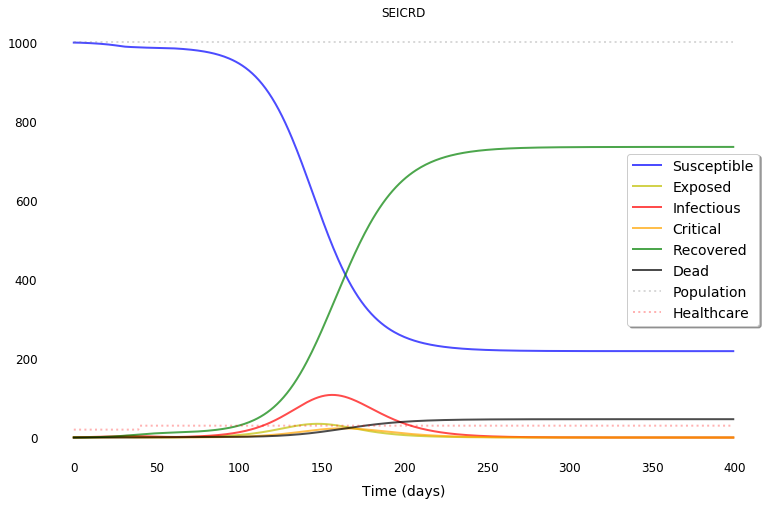

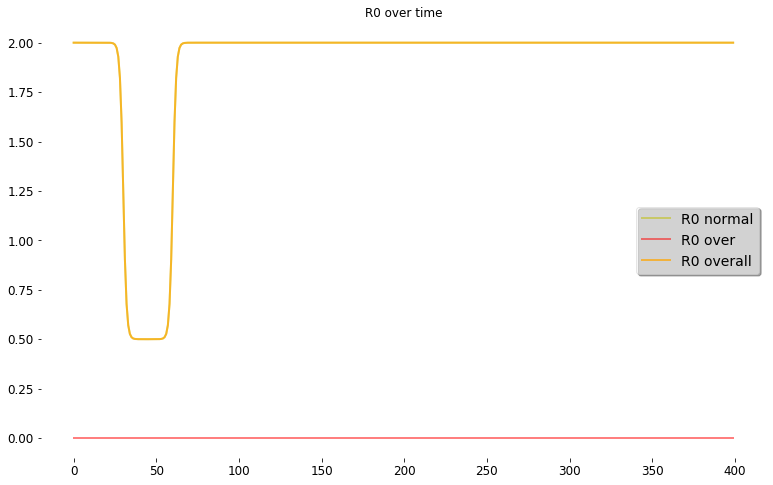

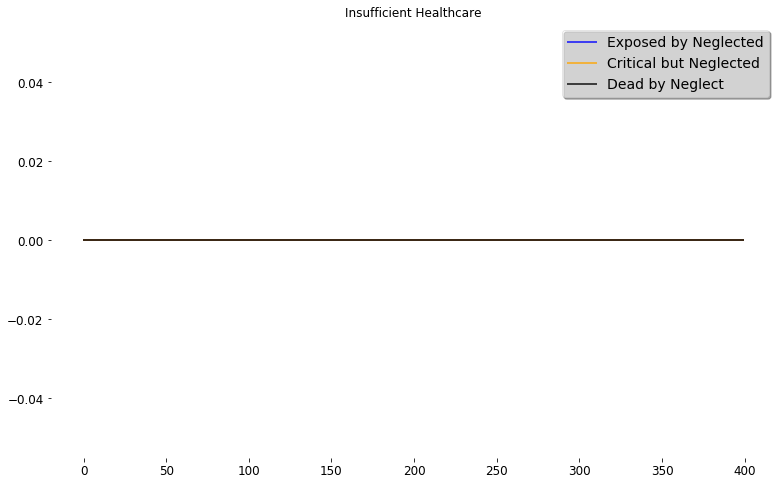

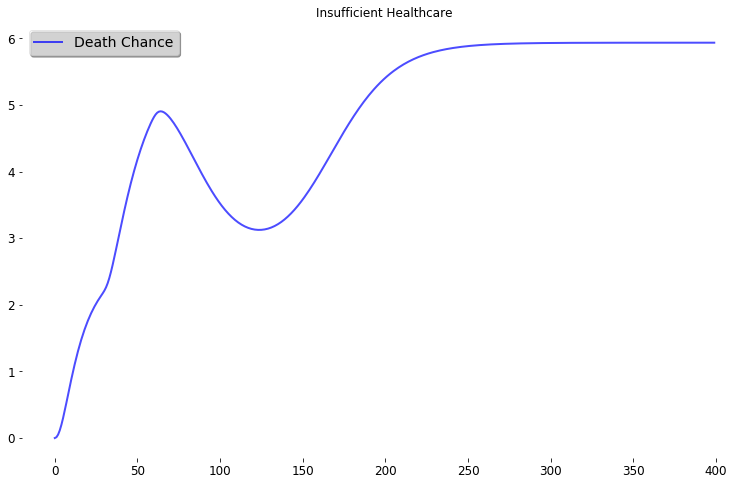

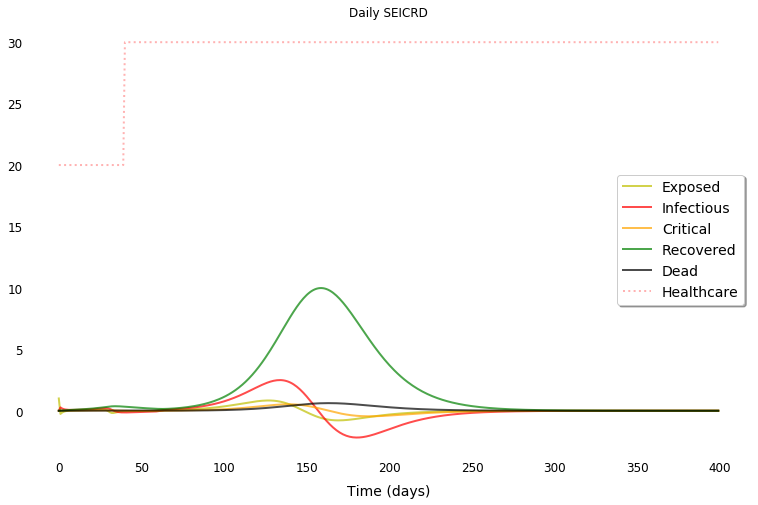

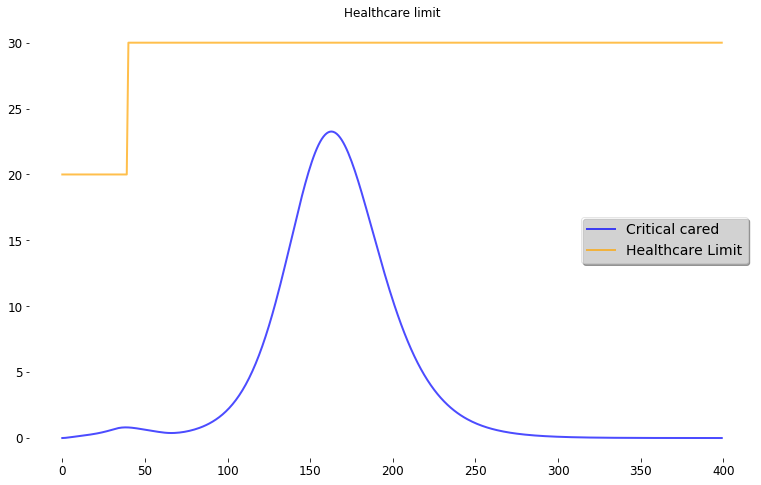

In [36]:
plot_pseicrd_l_ext2(*Model(
    days=400, 
    population=1000, 
    critical_limit_data=[
        (0, 20),
        (40, 30)
    ], 
    critical_chance=0.4, 
    death_chance_normal=0.2,
    death_time_over=2.0, 
    exposed_rate_critical=2.0, 
    r0_0=2.0, 
    r0_L=0.5, 
    L_start=30, 
    L_end=60, 
    k=1
))

# Fitting

In [37]:
# parameters
data = covid_data[covid_data["Location"] == "Italy"]["Value"].values[::-1]
critical_limit_data = [(0, beds_lookup["Italy"])]
outbreak_shift = 30
population = sum(agegroup_lookup["Italy"])
params_init_min_max = {
    "critical_chance": (0.05, 0.01, 0.1), 
    "death_chance_normal": (0.5, 0.05, 0.8),
    "death_time_over": (2.0, 1.0, 3.0),
    "exposed_rate_critical": (2.0, 1.0, 3.0), 
    "r0_0": (3.0, 2.0, 5.0), 
    "r0_L": (0.9, 0.3, 3.5),
    "L_start": (90, 1, 120), 
    "L_end": (120, 1, 120),
    "k": (2.5, 0.01, 5.0)
}  # form: {parameter: (initial guess, minimum value, max value)}

In [38]:
days = outbreak_shift + len(data)
if outbreak_shift >= 0:
    y_data = np.concatenate((np.zeros(outbreak_shift), data))
else:
    y_data = y_data[-outbreak_shift:]

x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array

def fitter(x, critical_chance, death_chance_normal, death_time_over, exposed_rate_critical, r0_0, r0_L, L_start, L_end, k):
    ret = Model(days, population, critical_limit_data, critical_chance, death_chance_normal, death_time_over, exposed_rate_critical, r0_0, r0_L, L_start, L_end, k)
    dead_normal = ret[9]
    dead_over = ret[10]
    dead = sum_element(dead_normal, dead_over)
    return dead[x]

In [39]:
mod = lmfit.Model(fitter)

for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"

In [40]:
result = mod.fit(y_data, params, method="least_squares", x=x_data)

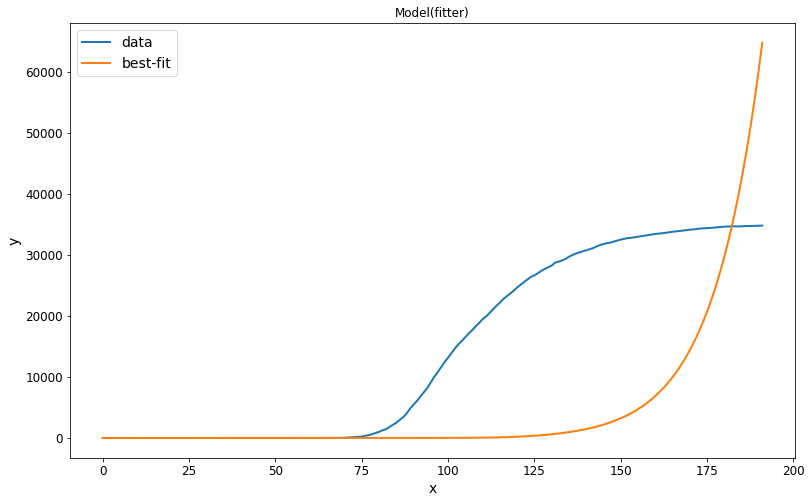

In [41]:
result.plot_fit(datafmt="-");

In [42]:
result

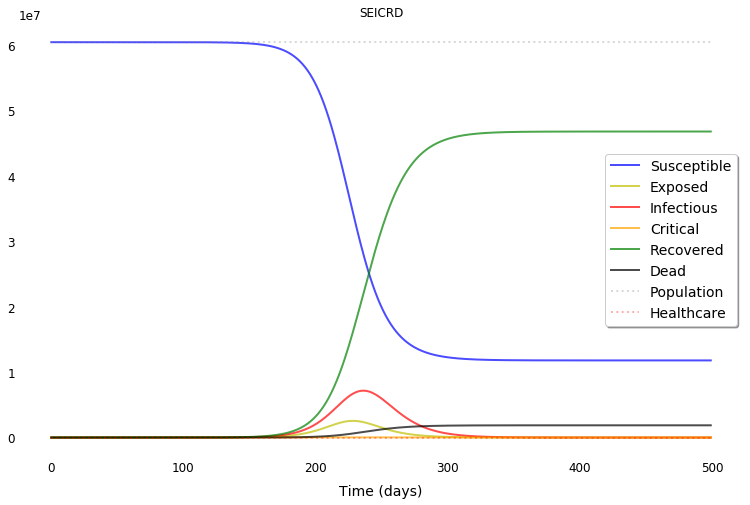

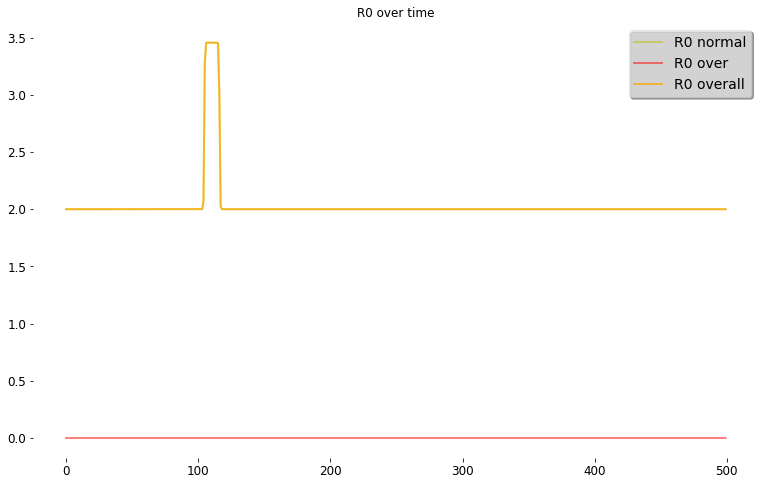

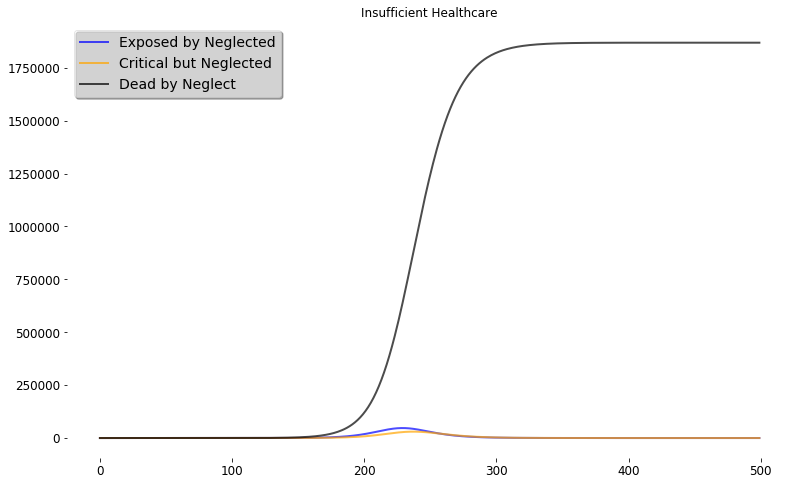

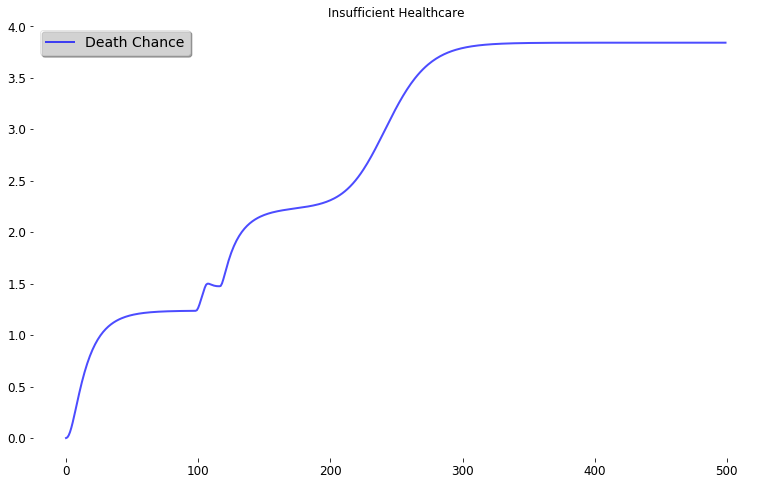

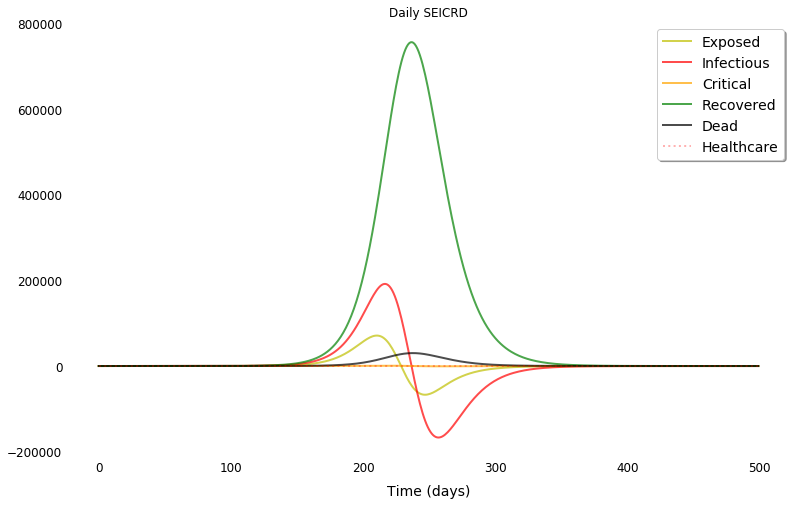

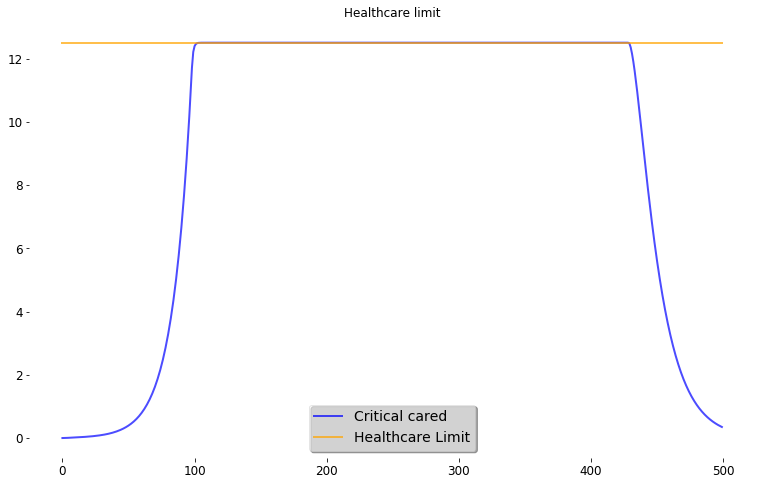

In [43]:
full_days = 500
plot_pseicrd_l_ext2(*Model(
    days=full_days, 
    population=population, 
    critical_limit_data=critical_limit_data, 
    **result.best_values
))

Wow. Very bad fit. I wonder what could be done to fix this?